# Sujet 6 : Autour du Paradoxe de Simpson

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

## Dataset load

We start by load the data and to store it locally if it is not already stored

In [2]:
data_url = "https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv?inline=false"
chemin = "downloaded.csv"

In [3]:
import requests
def store_data_locally():
    req = requests.get(data_url)
    url_content = req.content
    csv_file = open(chemin, 'wb')

    csv_file.write(url_content)
    csv_file.close()


import os 
if os.path.exists(chemin):
    df = pd.read_csv(chemin)
    #, skiprows=1)
else :
    store_data_locally()
    df = pd.read_csv(chemin)
    #, skiprows=1)
    
df

,Smoker,Status,Age
0,Yes,Alive,21.0
1,Yes,Alive,19.3
2,No,Dead,57.5
3,No,Alive,47.1
4,Yes,Alive,81.4
5,No,Alive,36.8
6,No,Alive,23.8
7,Yes,Dead,57.5
8,Yes,Alive,24.8
9,Yes,Alive,49.5


## Dataset Exploration

In [4]:
df.shape

(1314, 3)

In [5]:
df.head()

,Smoker,Status,Age
0,Yes,Alive,21.0
1,Yes,Alive,19.3
2,No,Dead,57.5
3,No,Alive,47.1
4,Yes,Alive,81.4


In [8]:
df.columns

Index(['Smoker', 'Status', 'Age'], dtype='object')

In [10]:
print(df.describe(include='all'))

       Smoker Status          Age
count    1314   1314  1314.000000
unique      2      2          NaN
top        No  Alive          NaN
freq      732    945          NaN
mean      NaN    NaN    47.359361
std       NaN    NaN    19.160667
min       NaN    NaN    18.000000
25%       NaN    NaN    31.300000
50%       NaN    NaN    44.800000
75%       NaN    NaN    60.600000
max       NaN    NaN    89.900000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
Smoker    1314 non-null object
Status    1314 non-null object
Age       1314 non-null float64
dtypes: float64(1), object(2)
memory usage: 30.9+ KB


In [38]:
len(df)

1314

So this dataset has information about 1314 women and there are no missing values

### Some graphics

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a583c4048>]],
      dtype=object)

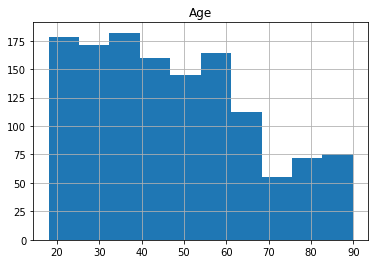

In [45]:
df.hist(column='Age')

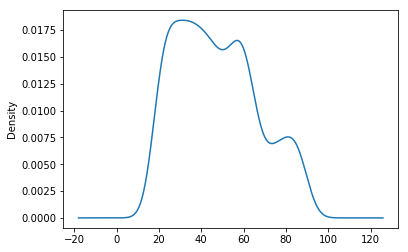

In [46]:
df['Age'].plot.kde()

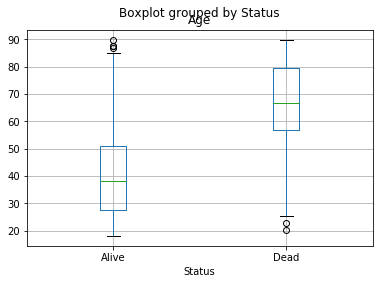

In [47]:
#comparaison des distributions avec un boxplot
df.boxplot(column='Age',by='Status')

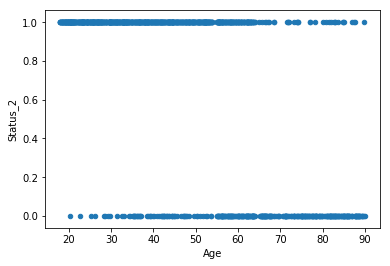

In [68]:
d={'Alive':1,'Dead':0}
#df2 = df[['Status','Age']]
#df2
new_df=[d[t] for t in df['Status']]
#df.plot.scatter(x='Age',y='Status')
#,c=''
df['Status_2']=new_df
df

df.plot.scatter(x='Age',y='Status_2')
#,c='')

## Dataset analysis

**1. Question 1**

Représentez dans un tableau le nombre total de femmes vivantes et décédées sur la période en fonction de leur habitude de tabagisme. 

In [11]:
df['Status'].describe()

count      1314
unique        2
top       Alive
freq        945
Name: Status, dtype: object

In [13]:
df['Status'].value_counts()

Alive    945
Dead     369
Name: Status, dtype: int64

In [17]:
df.loc[df['Status']=="Alive",:]

,Smoker,Status,Age
0,Yes,Alive,21.0
1,Yes,Alive,19.3
3,No,Alive,47.1
4,Yes,Alive,81.4
5,No,Alive,36.8
6,No,Alive,23.8
8,Yes,Alive,24.8
9,Yes,Alive,49.5
10,Yes,Alive,30.0
12,Yes,Alive,49.2


In [20]:
#
pd.crosstab(df['Status'],df['Smoker'])
#],normalize='index'

Smoker,No,Yes
Status,,
Alive,502,443
Dead,230,139


In [41]:
df.groupby('Status').get_group('Alive')

,Smoker,Status,Age
0,Yes,Alive,21.0
1,Yes,Alive,19.3
3,No,Alive,47.1
4,Yes,Alive,81.4
5,No,Alive,36.8
6,No,Alive,23.8
8,Yes,Alive,24.8
9,Yes,Alive,49.5
10,Yes,Alive,30.0
12,Yes,Alive,49.2


**1. Question 1**

Calculez dans chaque groupe (fumeuses / non fumeuses) le taux de mortalité (le rapport entre le nombre de femmes décédées dans un groupe et le nombre total de femmes dans ce groupe). 

In [36]:
#
smoker = df.loc[df['Smoker']=="Yes"]
smoker = smoker[df['Status']=="Dead"].shape[0] / smoker.shape[0]
print("Le taux de mortalité des fumeuses est de {} %".format(round(smoker*100,2)))

Le taux de mortalité des fumeuses est de 23.88 %


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [37]:
#
no_smoker = df.loc[df['Smoker']=="No"]
no_smoker = no_smoker[df['Status']=="Dead"].shape[0] / no_smoker.shape[0]
print("Le taux de mortalité des fumeuses est de {} %".format(round(no_smoker*100,2)))

Le taux de mortalité des fumeuses est de 31.42 %


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


**1. Question 1**
 
Vous pourrez proposer une représentation graphique de ces données et calculer des intervalles de confiance si vous le souhaitez. En quoi ce résultat est-il surprenant ?

In [39]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

mean_confidence_interval(df)

TypeError: can't multiply sequence by non-int of type 'float'

**2. Question 2**

Reprenez la question 1 (effectifs et taux de mortalité) en rajoutant une nouvelle catégorie liée à la classe d'âge. On considérera par exemple les classes suivantes : 18-34 ans, 34-54 ans, 55-64 ans, plus de 65 ans. En quoi ce résultat est-il surprenant ? Arrivez-vous à expliquer ce paradoxe ? De même, vous pourrez proposer une représentation graphique de ces données pour étayer vos explications.

**3. Question 3**

Afin d'éviter un biais induit par des regroupements en tranches d'âges arbitraires et non régulières, il est envisageable d'essayer de réaliser une régression logistique. Si on introduit une variable Death valant 1 ou 0 pour indiquer si l'individu est décédé durant la période de 20 ans, on peut étudier le modèle Death ~ Age pour étudier la probabilité de décès en fonction de l'âge selon que l'on considère le groupe des fumeuses ou des non fumeuses. Ces régressions vous permettent-elles de conclure sur la nocivité du tabagisme ? Vous pourrez proposer une représentation graphique de ces régressions (en n'omettant pas les régions de confiance).